In [113]:
from IPython.display import display, HTML
from datetime import datetime

# Define the notebook title
Notebook_title = "Decision Tree"

# Get the current date
current_date = datetime.now().strftime("%B %d, %Y")

# Create the HTML string with title, date, and author
html_content = f"""
<h1 style="text-align:center;">{Notebook_title}</h1>
<br/>
<h3 style="text-align:left;">MikiasHWT</h3>
<h3 style="text-align:left;">{current_date}</h3>
"""

# Display the HTML content in the output
display(HTML(html_content))


# Prep Workplace

## Imports

In [114]:
import numpy as np
import pandas as pd
import os 

# To show multiple lines in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Directories

In [115]:
# Directories = {
#     "datDir": "path/",
#     "outDir": "path/"
# }

# # Data Directory
# datDir = "samples"

# # View data
# os.listdir(datDir)

# # Output Directory
# outDir = ""

# # View outputs
# os.listdir(outDir)

# # Define required directories
# Directories = {
#     "datDir": "path/to/data",
#     "outDir": "path/to/output"
# }

# # Create directories (if they don't exist) & list contents
# for folder, path in Directories.items():
#     os.makedirs(path, exist_ok=True) 
#     print(f"Contents of {path}:")
#     print("\n".join(os.listdir(path))) 

# Background

## Motivation
- Practice application of machine learning mode: Decision Tree Regression
- Apply model on house prices and determine optimal parameters to minimize error
- Apply feature selection methods

## Data Source
- Home prices in Melbourne, Australia from Kaggle

In [116]:
HouseDataPath = "samples\melb_data.csv"

HouseDat = pd.read_csv(HouseDataPath)

HouseDat.describe()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Owner\AppData\Local\Temp\ipykernel_6980\2995408063.py:1: SyntaxWarning: invalid escape sequence '\m'
  HouseDataPath = "samples\melb_data.csv"


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [117]:
# Oldest house (This seems like a mistake)
print("The oldest house was built in:", 
      round(HouseDat["YearBuilt"].min()), 
      "\nThis seems like an error.")

# Newest house
print("\nThe newest house in:", 
      round(HouseDat["YearBuilt"].max()))

# Average price
print("\nAverage home price is:", 
      round(HouseDat["Price"].mean(), 2), 
      "\nCurrency unknown.")

The oldest house was built in: 1196 
This seems like an error.

The newest house in: 2018

Average home price is: 1075684.08 
Currency unknown.


In [118]:
# Variables
HouseDat.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [119]:
# Count number of observations with missing values
print(f"{HouseDat.isnull().any(axis=1).sum()} observations have missing values, from {len(HouseDat)} total.")

print(f"\nWe move forward with {len(HouseDat.dropna())} observations.")

# Drop observations with missing variables
CleanHouseDat = HouseDat.dropna(axis=0)

# # Change in mean price
# print(round(CleanHouseDat["Price"].mean() - HouseDat["Price"].mean()))

7384 observations have missing values, from 13580 total.

We move forward with 6196 observations.


In [120]:
# Extract outcome variable -y (prediction target)
y = CleanHouseDat.Price

# Determine predictor variables -X (features)
# Save as list of strings
features_x = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = CleanHouseDat[features_x]

# # All Variables
# HouseDat.columns

In [121]:
# New stats
X.describe()

# Slice
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


# Scikit-learn (sklearn)
The steps to building and using a model are:

- Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- Fit: Capture patterns from provided data. This is the heart of modeling.
- Predict: Just what it sounds like
- Evaluate: Determine how accurate the model's predictions are.


In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [123]:
# Create training and testing sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Define model and seed
House_Model = DecisionTreeRegressor(random_state=1)

# Fit model
House_Model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [124]:
# predict prices for top 5 houses
print(House_Model.predict(val_X.head()))

# Actual prices
print(CleanHouseDat["Price"].head())

[ 900000.  696750. 1120000. 1590000.  630000.]
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


# Model Validation
Mean Absolute Error (MAE) 
- where: error = actual - predicted


Models can suffer from either:

- Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
- Use validation data, which isn't used in model training, to measure a candidate model's accuracy.


In [125]:
from sklearn.metrics import mean_absolute_error

# Determine accuracy of predictions
predicted_prices = House_Model.predict(val_X)

mean_absolute_error(val_y, predicted_prices)

np.float64(273518.01872175594)

<!-- ![Over vs Under Fitting](./img/DataFitting.png) -->

<img src="./img/DataFitting.png" alt="Over vs Under Fitting" width="400" height="300">

In [126]:
# Define function to test various branching number models & return MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# Use for loop to compare MAE'
for max_leaf_nodes in [5, 25, 50, 100, 500, 525, 550, 600, 650, 700, 800, 900, 1000, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 25  		 Mean Absolute Error:  307919
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 100  		 Mean Absolute Error:  269191
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 525  		 Mean Absolute Error:  260921
Max leaf nodes: 550  		 Mean Absolute Error:  260545
Max leaf nodes: 600  		 Mean Absolute Error:  260675
Max leaf nodes: 650  		 Mean Absolute Error:  261345
Max leaf nodes: 700  		 Mean Absolute Error:  261664
Max leaf nodes: 800  		 Mean Absolute Error:  260329
Max leaf nodes: 900  		 Mean Absolute Error:  262051
Max leaf nodes: 1000  		 Mean Absolute Error:  262044
Max leaf nodes: 5000  		 Mean Absolute Error:  271320


Text(0.5, 0, 'Max Leaf Nodes')

([<matplotlib.axis.XTick at 0x244cfcec3b0>,
 [Text(0, 0, '0'),
  Text(500, 0, '500'),
  Text(1000, 0, '1000'),
  Text(1500, 0, '1500'),
  Text(2000, 0, '2000'),
  Text(2500, 0, '2500')])

Text(0, 0.5, 'Mean Absolute Error (MAE)')

Text(0.5, 1.0, 'MAE vs. Max Leaf Nodes')

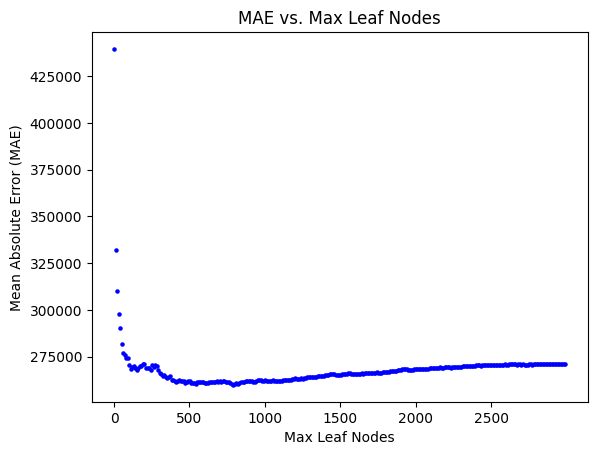

In [127]:
import matplotlib.pyplot as plt

# Initialize empty lists 
max_leaf_nodes_list = []
mae_list = []

# Loop to calculate MAE for range of max_leaf_nodes
for max_leaf_nodes in range(2, 3000, 10):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    
    max_leaf_nodes_list.append(max_leaf_nodes) # append values
    mae_list.append(my_mae)

# dot plot
plt.scatter(max_leaf_nodes_list, mae_list, color='blue', s=5)  
plt.xlabel("Max Leaf Nodes")  
plt.xticks(ticks=range(0, 3000, 500))
plt.ylabel("Mean Absolute Error (MAE)")  
plt.title("MAE vs. Max Leaf Nodes")  
plt.show() 

In [128]:
# Determine smallest Mean Absolute value 

# Initialize variables 
smallest_mae = float('inf')  # Set to infinity so any MAE will be smaller initially
best_max_leaf_nodes = None

# Use for loop to compare MAE's
for max_leaf_nodes in range(2,3000,10):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    
    # Update the smallest MAE and best_max_leaf_nodes if current MAE is smaller
    if my_mae < smallest_mae:
        smallest_mae = my_mae
        best_max_leaf_nodes = max_leaf_nodes

# print result
print(f"Smallest MAE: {smallest_mae} with Max Leaf Nodes: {best_max_leaf_nodes}")


Smallest MAE: 259810.02623869144 with Max Leaf Nodes: 792


In [129]:
# Fit final model
final_model = DecisionTreeRegressor(max_leaf_nodes=best_max_leaf_nodes, random_state=1)

# fit all the data
final_model.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=792, random_state=1)

# Random Forest Models

random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters

In [130]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)

forest_model.fit(train_X, train_y)

forest_predicted_prices = forest_model.predict(val_X)

mean_absolute_error(val_y, forest_predicted_prices)

RandomForestRegressor(random_state=1)

np.float64(207190.6873773146)

# Feature Selection

Decision trees built-in mechanism feature_importance_ can access the attributes to see the importance of each predictor variable.

In [131]:
X_all.describe()

# Select categorical variables (columns with 'object' or 'category' data types)
categorical_columns = CleanHouseDat.select_dtypes(include=['object', 'category']).columns

print("Categorical variables:", categorical_columns)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201
std,0.971079,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165
min,1.000000,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370
25%,2.000000,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198
50%,3.000000,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800
75%,4.000000,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700
max,8.000000,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350


Categorical variables: Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [132]:
# Extract outcome variable -y (prediction target)
y = CleanHouseDat.Price

# # Select categorical variables (columns with 'object' or 'category' data types)
# categorical_columns = CleanHouseDat.select_dtypes(include=['object', 'category']).columns

# print("Categorical variables:", categorical_columns)

# Determine predictor variables -X (features)
# Save as list of strings (Remove Address, Date, Regionname, SellerG, Propertycount, Suburb, Type, CouncilArea & Method)
features_x_all = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 
                  'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                    'YearBuilt', 'Lattitude', 'Longtitude']

X_all = CleanHouseDat[features_x_all]

# Decision trees can handle categorical data if they are encoded properly. Most scikit-learn models expect numerical data.
# Categorical variables can be encoded using OneHotEncoder or LabelEncoder before fitting the model
X_all_encoded = pd.get_dummies(X_all)

# Create training and testing sets
train_X_all, val_X_all, train_y, val_y = train_test_split(X_all_encoded, y, random_state=0)

# Define model and seed
house_model_all = DecisionTreeRegressor(random_state=1)

# Fit/train model
house_model_all.fit(train_X_all, train_y)

# Get feature importances
importances = house_model_all.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': train_X_all.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importances)

DecisionTreeRegressor(random_state=1)

         Feature  Importance
7   BuildingArea    0.431193
8      YearBuilt    0.147656
9      Lattitude    0.099603
1       Distance    0.089188
6       Landsize    0.082445
2       Postcode    0.061462
10    Longtitude    0.041031
4       Bathroom    0.021493
3       Bedroom2    0.012411
5            Car    0.008078
0          Rooms    0.005441


Recursive Feature Elimination (RFE)
- RFE helps identify the best subset of features for the model by recursively removing variables, and the model is retrained on the remaining features.

In [133]:
from sklearn.feature_selection import RFE

# Initialize the DecisionTreeRegressor model
RFE_model = DecisionTreeRegressor(random_state=1)

# Initialize RFE with the decision tree model
rfe = RFE(RFE_model, n_features_to_select=5)  # Specify how many features to select

# Fit RFE on the data
rfe = rfe.fit(train_X_all, train_y)

# Check which features were selected
selected_features = train_X_all.columns[rfe.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude'], dtype='object')


SelectKBest
- SelectKBest selects the top K features based on a statistical test like the F-test or mutual information.

In [134]:
from sklearn.feature_selection import SelectKBest, f_regression

# Initialize SelectKBest to select the top 10 features
selector = SelectKBest(score_func=f_regression, k=10)

# Fit the selector to the data
selector.fit(train_X_all, train_y)

# Get the selected features
selected_features = train_X_all.columns[selector.get_support()]
print("Selected features: ", selected_features)

SelectKBest(score_func=<function f_regression at 0x00000244D3470180>)

Selected features:  Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')


# Optimized Model

In [135]:
final_forest_model = RandomForestRegressor(random_state=1)

final_forest_model.fit(train_X_all, train_y)

final_forest_predicted_prices = final_forest_model.predict(val_X_all)

mean_absolute_error(val_y, final_forest_predicted_prices)

RandomForestRegressor(random_state=1)

np.float64(181997.86810845707)

# End

## Show Session Information

In [136]:
import session_info
session_info.show()

## Save Session Requirements

In [137]:
# Replace spaces in notebook title with underscores
filename = Notebook_title.replace(" ", "_") + "_requirements.txt"

# Run the pip freeze command and save the output txt file
!pip freeze > $filename